In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates


In [2]:
df = pd.read_csv('protonCount.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp',inplace=True)

In [3]:
from scipy.integrate import dblquad
def beamFraction(x_=0, y_=0, dx=1, dy=1,beam_x = 0, beam_y=0, r=None):
    amplitude, xo, yo, sigma_x, sigma_y, theta, offset = 1/628.3185307179515, beam_x, beam_y, 10, 10, 0, 0

    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    f = lambda y,x: offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo)+ c*((y-yo)**2)))

    if r is None:
        return dblquad(f, x_-dx/2, x_+dx/2, y_-dy/2, y_+dy/2)[0]
    else:
        return dblquad(f, x_-r, x_+r, lambda x: -1*(r**2-(x-x_)**2)**.5, lambda x: (r**2-(x-x_)**2)**.5)[0]

In [4]:
#position information/timing, taken from google sheet
df['Position']=np.nan
df['BeamFraction']=np.nan

df.loc['2021-12-15 16:58','Position'] = 205
df.loc['2021-12-15 17:11','Position'] = 245
df.loc['2021-12-15 17:20','Position'] = 265
df.loc['2021-12-15 17:30','Position'] = 275
df.loc['2021-12-15 17:58','Position'] = 255
df.loc['2021-12-15 18:10','Position'] = 265
df.loc['2021-12-15 18:15','Position'] = 270
df.loc['2021-12-15 18:28','Position'] = 275
df.loc['2021-12-16 11:30','Position'] = 280
df.loc['2021-12-16 16:00','Position'] = 282
df.loc['2021-12-17 13:58','Position'] = 275
df.loc['2021-12-17 14:02','Position'] = 255
df.loc['2021-12-17 14:04','Position'] = 282

df['Distance'] = 305-df.Position
df.loc[~df.isna().Distance,"BeamFraction"] = np.vectorize(beamFraction)(df.loc[~df.isna().Distance,"Distance"],0,5.19,5.19)
df.ffill(inplace=True)

In [5]:
df['ECON proton count'] = df['BeamFraction']*df['proton count']
df['ECON Total proton count'] = df['ECON proton count'].cumsum()

(738139.25, 738141.75)

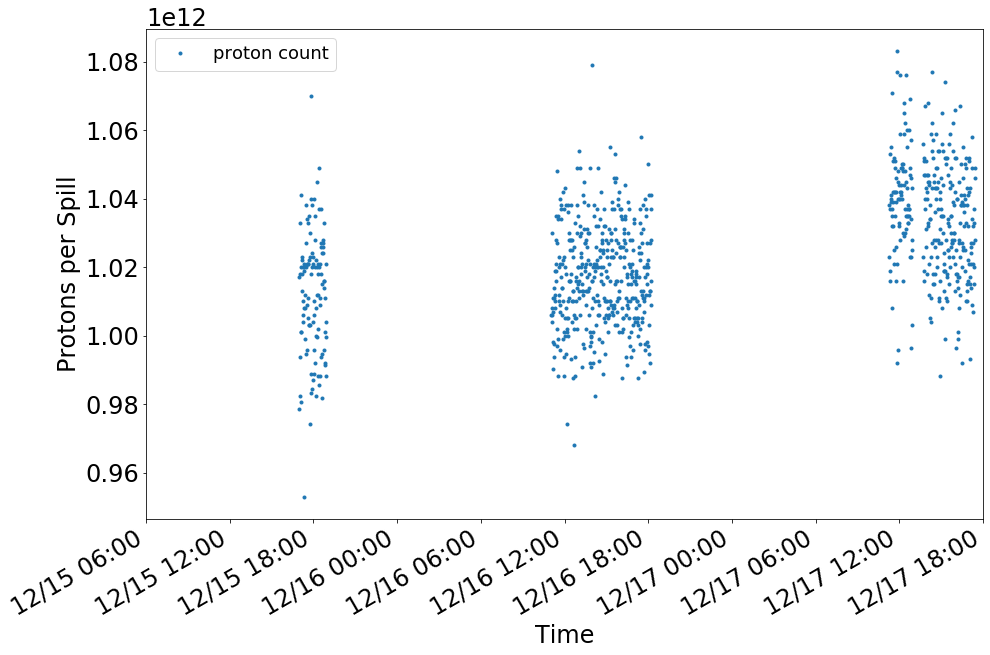

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot(y='proton count',style=".",ax=ax)
ax.set_ylabel('Protons per Spill',fontsize=24)
ax.set_xlabel('Time',fontsize=24)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.yaxis.get_offset_text().set_size(24)
ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%d %H:%M'))
ax.legend(fontsize=18)
ax.set_xlim('12-15-2021 06:00','12-17-2021 18:00')

(738139.25, 738141.75)

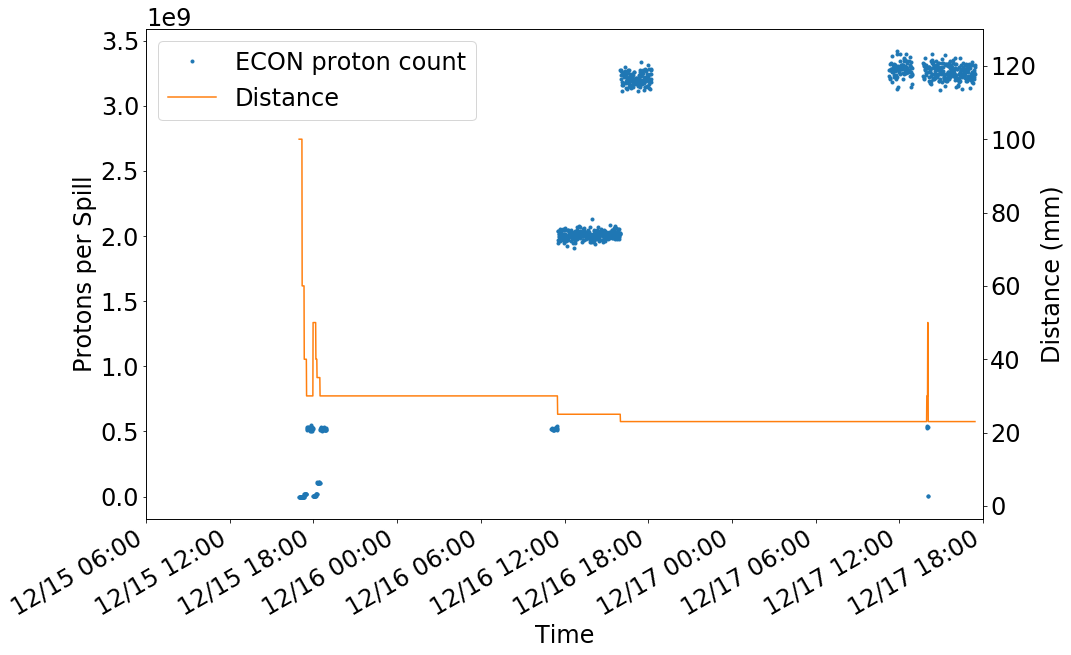

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot(y='ECON proton count',ax=ax,style=".")
df.plot(y='Distance',ax=ax,secondary_y=True)
ax.set_ylabel('Protons per Spill',fontsize=24)
ax.right_ax.set_ylabel('Distance (mm)',fontsize=24)
ax.set_xlabel('Time',fontsize=24)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.right_ax.tick_params(axis='y',labelsize=24)
ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%d %H:%M'))
ax.yaxis.get_offset_text().set_size(24)
ax.right_ax.yaxis.get_offset_text().set_size(24)
ax.right_ax.set_ylim(-3.5,130)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax.right_ax.get_legend_handles_labels()

ax.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=24)
ax.set_xlim('12-15-2021 06:00','12-17-2021 18:00')


(738139.25, 738141.75)

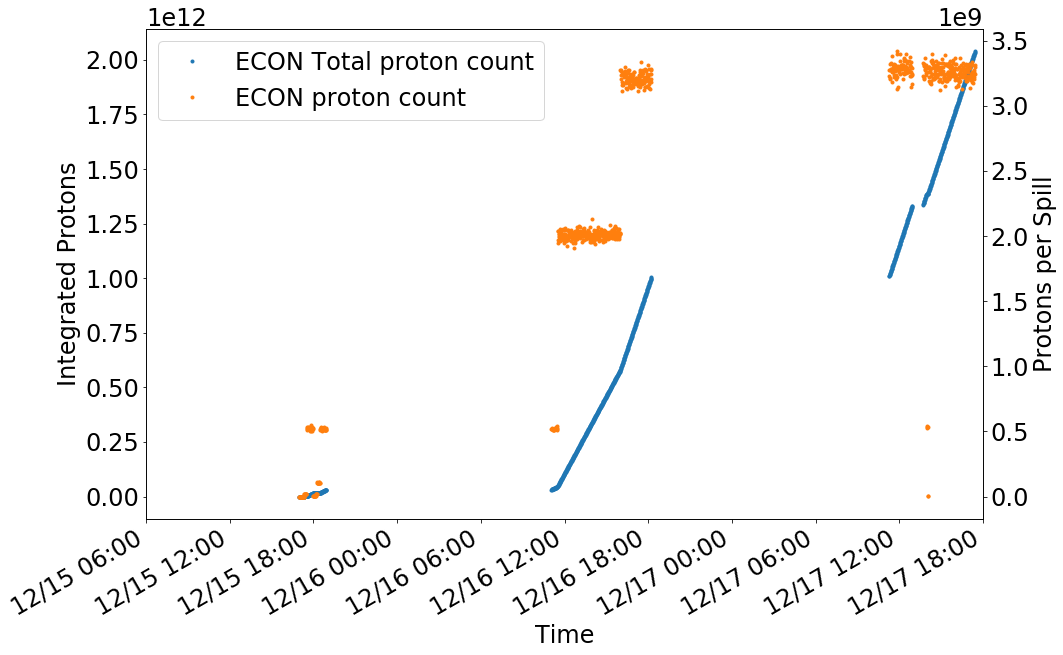

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot(y='ECON Total proton count',ax=ax,style=".")
df.plot(y='ECON proton count',ax=ax,style=".",secondary_y=True)
ax.set_ylabel('Integrated Protons',fontsize=24)
ax.right_ax.set_ylabel('Protons per Spill',fontsize=24)

ax.set_xlabel('Time',fontsize=24)
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
ax.right_ax.tick_params(axis='y',labelsize=24)
ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%d %H:%M'))
ax.yaxis.get_offset_text().set_size(24)
ax.right_ax.yaxis.get_offset_text().set_size(24)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax.right_ax.get_legend_handles_labels()

ax.legend(lines_1 + lines_2, labels_1 + labels_2, fontsize=24)
ax.set_xlim('12-15-2021 06:00','12-17-2021 18:00')
#ax.right_ax.legend(fontsize=24)

In [9]:
df.to_csv('fullProtonInfo.csv')